In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#  Loading Loan data

In [2]:
loans_df = pd.read_csv("loan.csv", encoding = "UTF-8", low_memory=False)

#### Doing Basic Checks here we can check the number of columns and rows also we can gather different kind of information about the dataset which forms our process of DATA UNDERSTANDING

In [3]:
loans_df.shape


(39717, 111)

 # Data Cleansing

#### Some columns have lot of null values , those may not be very useful for our analysis, we would need to drop all such coloumns to refine our analysis

In [4]:
# Dropping columns with only null values
loans_df_cdr=loans_df.dropna(axis=1,how='all')
loans_df_cdr.shape

(39717, 57)

#### Drop columns with more than 90% null values

In [5]:
# Drop columns with more than 90% null values
loans_df_cdr=loans_df_cdr.loc[:,round(loans_df_cdr.isnull().sum()/len(loans_df_cdr)*100,2)<90]
loans_df_cdr.shape

(39717, 55)

#### There are lot of columns  which are not required for our current anaysis, so we are dropping all such coloumns from our dataframe.

In [6]:
# Droping irrelevant columns which are not required for analysis
drop_columns=['id','member_id','funded_amnt_inv','emp_title','earliest_cr_line','url','total_acc','desc','title','zip_code','issue_d','last_credit_pull_d','last_pymnt_d']
loans_df_cdr=loans_df_cdr.drop(drop_columns,axis=1)
loans_df_cdr.dtypes

drop_columns1=['total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt']
loans_df_cdr=loans_df_cdr.drop(drop_columns1,axis=1)

#### Analysing datatypes of the the various coloumns of our dataframe

In [7]:
loans_df.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

#### Furthering our analysis, we would be Converting revol_util and int_rate into float
#### Creating a profit/loss coloumn and one column which is ratio of funded amount and annual income
#### Also to further our analysis we will group by important coloums such as grade , Profit and Loss , Home ownership , purpose of loan etc and try to figure out a relationship which helps in understanding data better.

In [8]:
# Converting revol_util and int_rate into float
loans_df_cdr.revol_util=loans_df_cdr.revol_util.str.rstrip('%').astype('float')
loans_df_cdr.int_rate=loans_df_cdr.int_rate.str.rstrip('%').astype('float')

# Creating a profit/loss column
loans_df_cdr['P_L']=round((loans_df_cdr['total_pymnt']-loans_df_cdr['funded_amnt'])*100/loans_df_cdr['funded_amnt'],2)

# Creating a column which is ratio of funded amount and annual income
loans_df_cdr['loan_inc_ratio']=round(loans_df_cdr.funded_amnt*100/loans_df_cdr.annual_inc,0)

print(loans_df_cdr.groupby(['grade'])['P_L'].median())
print(loans_df_cdr[(loans_df_cdr['inq_last_6mths']<3)].groupby('grade')['P_L'].median())
print(loans_df_cdr[(loans_df_cdr['grade']!='G')|(loans_df_cdr['home_ownership']!='OWN')].groupby('grade')['P_L'].median())
print(loans_df_cdr[(loans_df_cdr['grade']!='G')|(loans_df_cdr['home_ownership']!='OWN')].groupby('grade')['P_L'].median())
print(loans_df_cdr[(loans_df_cdr['grade']!='G')|(loans_df_cdr['purpose']!='medical')].groupby('grade')['P_L'].median())
print(loans_df_cdr[(loans_df_cdr['grade']!='G')|(loans_df_cdr['purpose']!='renewable_energy')].groupby('grade')['P_L'].median())
print(loans_df_cdr[(loans_df_cdr['grade']!='G')|(loans_df_cdr['purpose']!='small_business')].groupby('grade')['P_L'].median())
print(loans_df_cdr[(loans_df_cdr['grade']!='G')|((loans_df_cdr['home_ownership']!='OWN')&(~loans_df_cdr['purpose'].isin(['small_business','medical','renewable_energy'])))].groupby('grade')['P_L'].median())
#loans_df_cdr[(loans_df_cdr['grade']=='G')&(loans_df_cdr['emp_length']=='na')][['grade','emp_length']]
#loans_df_cdr.groupby(['emp_length','grade'])['term'].count()
print(loans_df_cdr[(loans_df_cdr['grade']=='G')&(loans_df_cdr['emp_length']=='< 1 year')]['purpose'].value_counts())

grade
A    10.280
B    16.330
C    20.750
D    23.800
E    27.370
F    30.410
G    31.405
Name: P_L, dtype: float64
grade
A    10.280
B    16.430
C    20.810
D    23.900
E    27.485
F    30.520
G    32.250
Name: P_L, dtype: float64
grade
A    10.28
B    16.33
C    20.75
D    23.80
E    27.37
F    30.41
G    31.77
Name: P_L, dtype: float64
grade
A    10.28
B    16.33
C    20.75
D    23.80
E    27.37
F    30.41
G    31.77
Name: P_L, dtype: float64
grade
A    10.28
B    16.33
C    20.75
D    23.80
E    27.37
F    30.41
G    31.68
Name: P_L, dtype: float64
grade
A    10.280
B    16.330
C    20.750
D    23.800
E    27.370
F    30.410
G    31.555
Name: P_L, dtype: float64
grade
A    10.28
B    16.33
C    20.75
D    23.80
E    27.37
F    30.41
G    34.34
Name: P_L, dtype: float64
grade
A    10.280
B    16.330
C    20.750
D    23.800
E    27.370
F    30.410
G    35.235
Name: P_L, dtype: float64
debt_consolidation    18
small_business         6
credit_card            6
home_improvement       2


#### Now narrowing our analysis accrding to the loan status and expressing it in terms of percentage

In [9]:
print("Percentage data points under consideration",round(loans_df_cdr.size/loans_df.size*100,2))
print("Percentage defaults in considered data set:",round(sum(loans_df_cdr.loan_status=='Charged Off')*100/len(loans_df_cdr),1))
print("Percentage defaults in considered data set:",round(sum(loans_df_cdr.loan_status=='Current')*100/len(loans_df_cdr),1))
print("Percentage defaults in considered data set:",round(sum(loans_df_cdr.loan_status=='Fully Paid')*100/len(loans_df_cdr),1))

Percentage data points under consideration 35.14
Percentage defaults in considered data set: 14.2
Percentage defaults in considered data set: 2.9
Percentage defaults in considered data set: 83.0


# # EXPLORATORY DATA ANALYSIS

### We will be plotting graphs between relavent coloumns of the dataframe and figure out a relationship to attain our aim. Firstly begining with ascerting the realtive comparision of percentage status of the loans

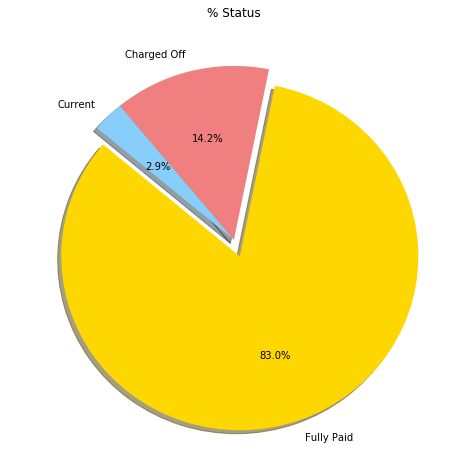

In [10]:
pie_label  = list(loans_df_cdr.loan_status.value_counts().index)
pie_colors = ['gold','lightcoral','lightskyblue']
pie_explode = (0.1,0,0)
pie_size =  list(loans_df_cdr.loan_status.value_counts().values)
#######################################################################################
plt.figure(figsize=(8,8))
plt.pie(pie_size,explode = pie_explode,labels = pie_label,colors =pie_colors,
       autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('% Status')
plt.show()

#### Relationship of default with funded amount & also plotting a relationship of loan charged of loans with the purpose for which it was taken.

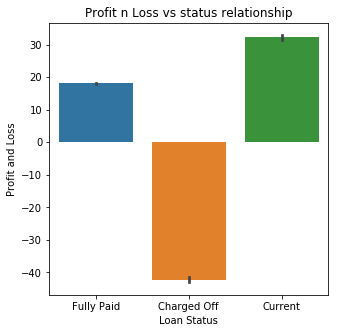

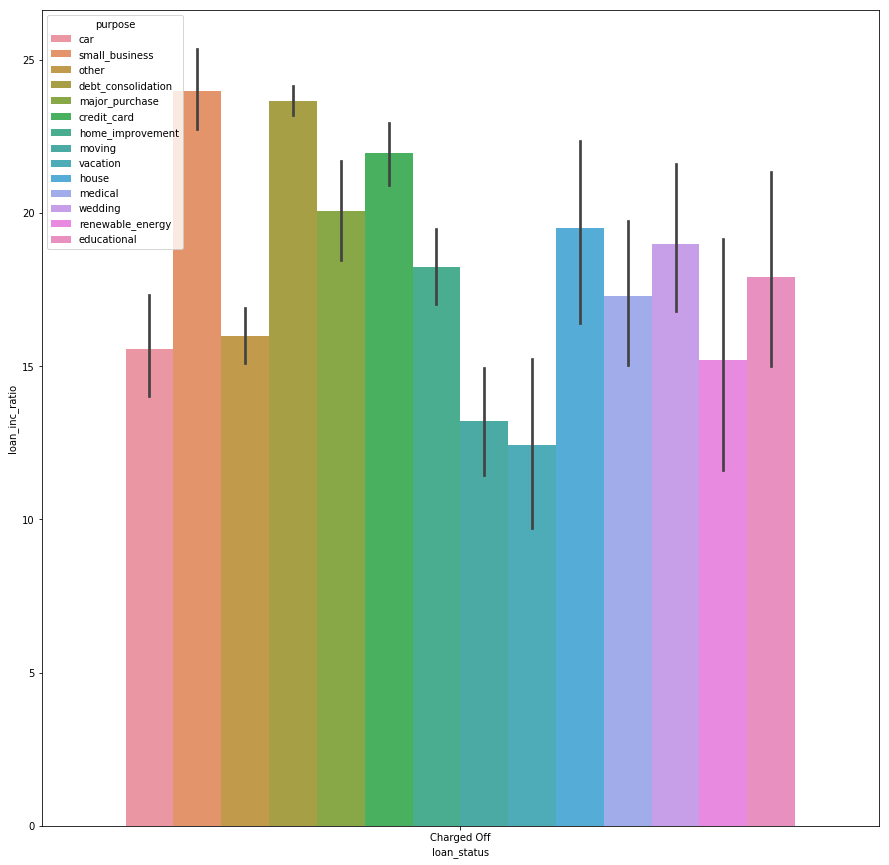

In [11]:

plt.figure(figsize=(5,5))

sns.barplot(x='loan_status',y='P_L',data=loans_df_cdr)
plt.xlabel("Loan Status")
plt.ylabel("Profit and Loss")

plt.title("Profit n Loss vs status relationship")

plt.show()


plt.figure(figsize=(15,15))

sns.barplot(x='loan_status',y='loan_inc_ratio',hue='purpose',data=loans_df_cdr[loans_df_cdr.loan_status=='Charged Off'])

plt.show()

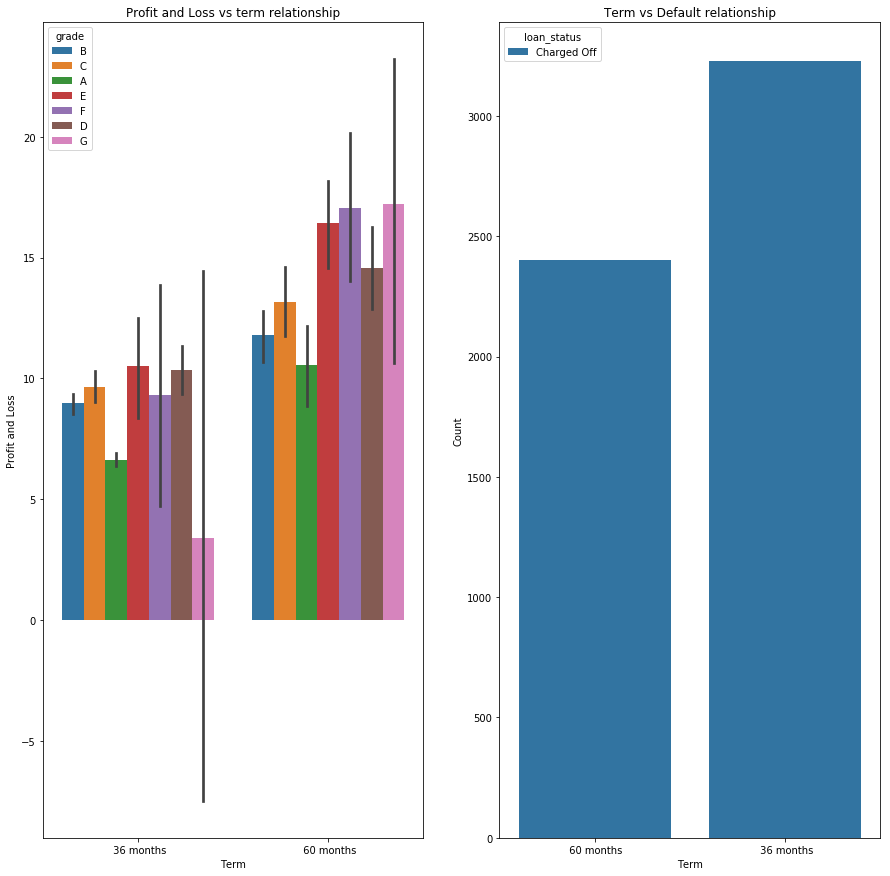

In [12]:
# Relationship of default with term
plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
sns.barplot(x='term',y='P_L',data=loans_df_cdr,hue='grade')
plt.xlabel("Term")
plt.ylabel("Profit and Loss")

plt.title("Profit and Loss vs term relationship")


plt.subplot(1,2,2)
sns.countplot('term',hue='loan_status',data=loans_df_cdr[loans_df_cdr.loan_status=='Charged Off'])
plt.xlabel("Term")
plt.ylabel("Count")
plt.title("Term vs Default relationship")
plt.show()

#### Relationship of default with Employment duration

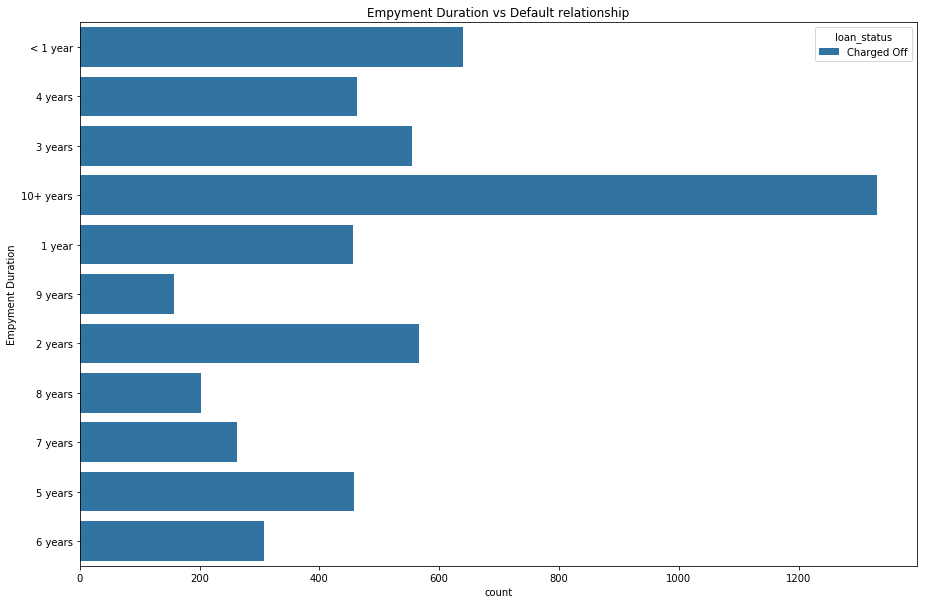

In [13]:

plt.figure(figsize=(15,10))
sns.countplot(y='emp_length',hue='loan_status',data=loans_df_cdr[loans_df_cdr.loan_status=='Charged Off'])
plt.xlabel("count")
plt.ylabel("Empyment Duration")
plt.title("Empyment Duration vs Default relationship")
plt.show()

#### Relation of Home ownership & Default

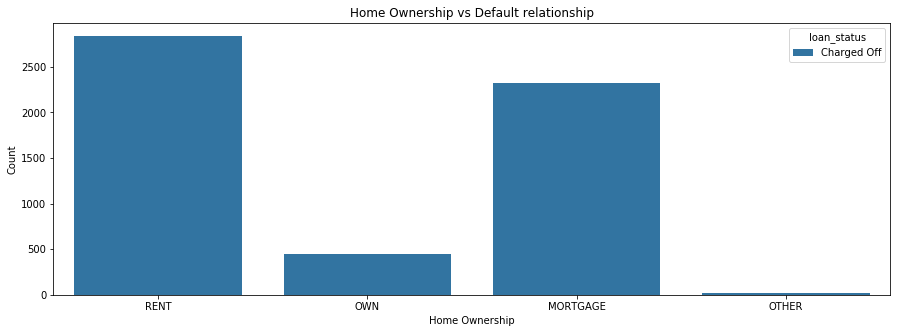

In [14]:

plt.figure(figsize=(15,5))
sns.countplot(x='home_ownership',hue='loan_status',data=loans_df_cdr[loans_df_cdr.loan_status=='Charged Off'])
plt.xlabel("Home Ownership")
plt.ylabel("Count")
plt.title("Home Ownership vs Default relationship")
plt.show()

#### Purpose vs Default relationship

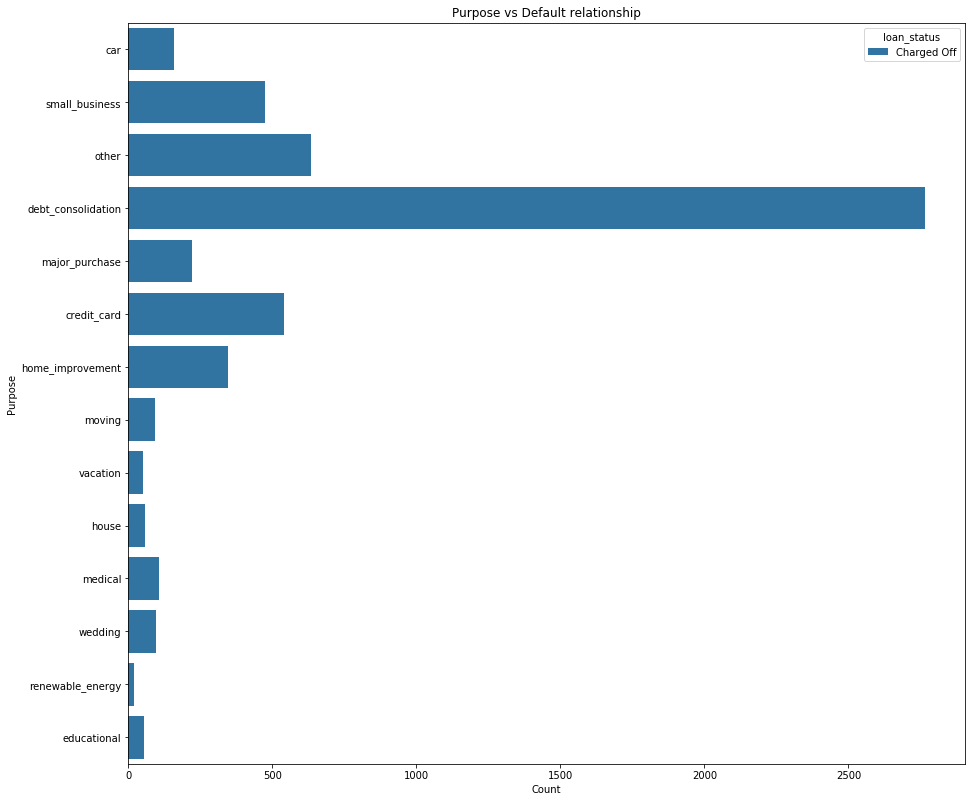

In [15]:

plt.figure(figsize=(15,30))
plt.subplot(2,1,2)
sns.countplot(y='purpose',hue='loan_status',data=loans_df_cdr[loans_df_cdr.loan_status=='Charged Off'])
plt.ylabel("Purpose")
plt.xlabel("Count")
plt.title("Purpose vs Default relationship")
plt.show()

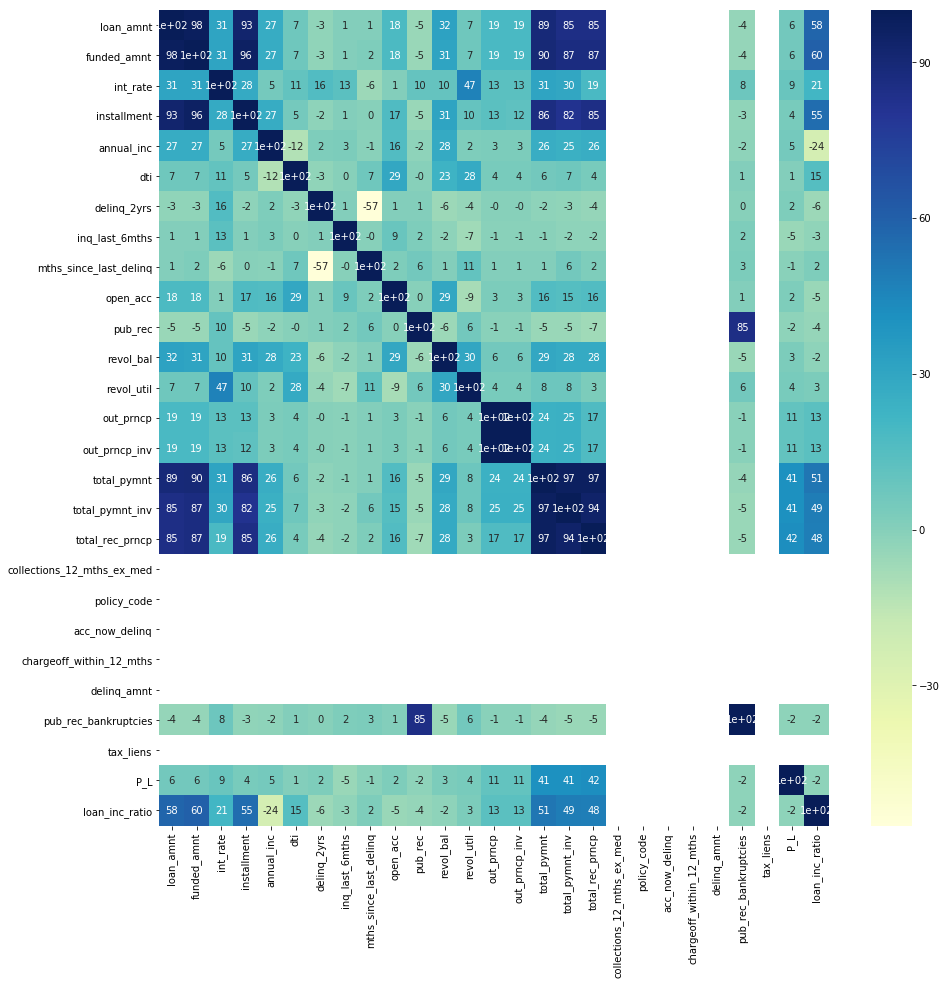

In [16]:
plt.figure(figsize=(15,15))
sns.heatmap(round(loans_df_cdr.corr()*100,0),annot=True,cmap="YlGnBu")
plt.show()

### When we try to do a univariate analysis on the percent of Account verified, there are huge number of loan applications which are not verified, which may result in lot of not proper applications being accepted

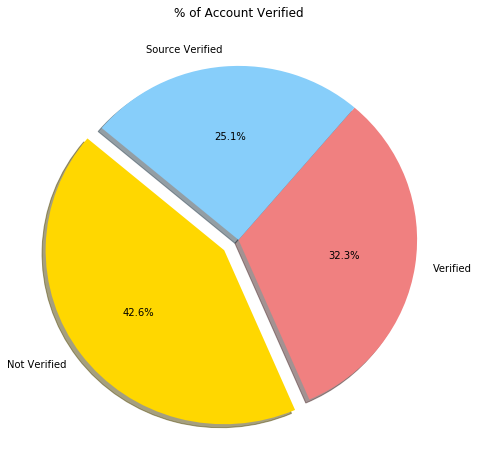

In [17]:
pie_label  = list(loans_df_cdr.verification_status.value_counts().index)
pie_colors = ['gold','lightcoral','lightskyblue']
pie_explode = (0.1,0,0)
pie_size =  list(loans_df_cdr.verification_status.value_counts().values)
#######################################################################################
plt.figure(figsize=(8,8))
plt.pie(pie_size,explode = pie_explode,labels = pie_label,colors =pie_colors,
       autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('% of Account Verified')
plt.show()

#### WE observe from below graph that majority of loan purpose of charged of loans is debt consolidation.

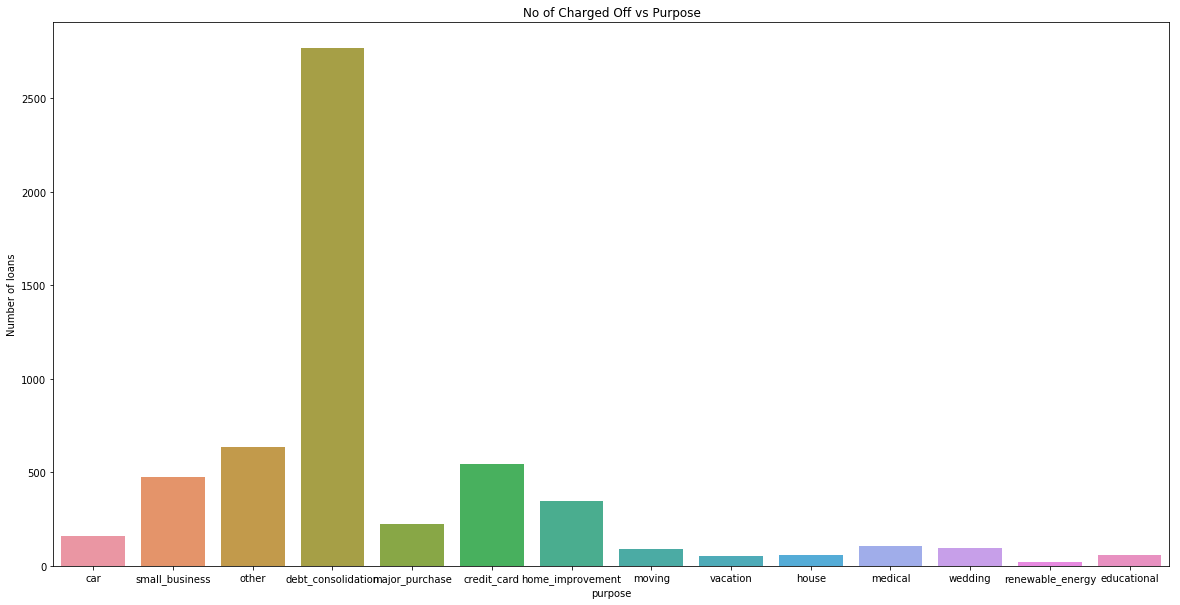

In [18]:
plt.figure(figsize = (20,10))
sns.countplot(x = 'purpose',data = loans_df_cdr[loans_df_cdr.loan_status=='Charged Off'])
plt.ylabel('Number of loans')
plt.title('No of Charged Off vs Purpose')
plt.show()

#### Also when we focus our analysis to just loan status= "Charged Off", our analysis is further strengthened with the below plotted graphs

In [19]:
loans_charged_off = loans_df_cdr[loans_df_cdr.loan_status=='Charged Off']

#### We observe in the below graphical representation that most number of charged off loans are from the state of 'CA'

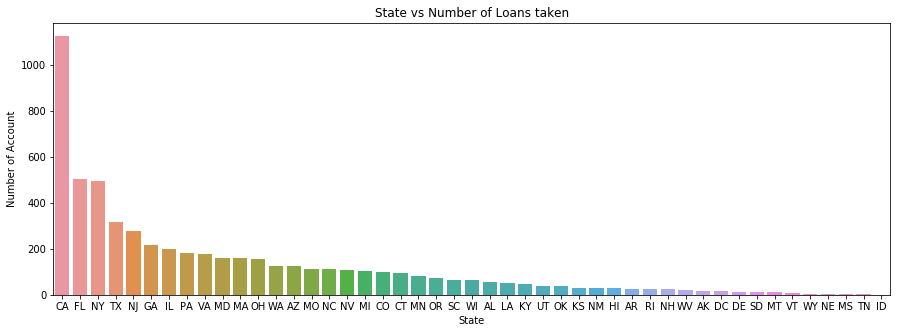

In [20]:
plt.figure(figsize = (15,5))
sns.countplot(x = 'addr_state',data=loans_charged_off,order=loans_charged_off['addr_state'].value_counts().index)
plt.xlabel('State')
plt.ylabel('Number of Account')
plt.title('State vs Number of Loans taken')
plt.show()

#### Checking Relation between Loan Amount, Interest Rates and Grade of the Employee

#### We can observe Grades E & F are being provided higher loan amount at higher interest rates. Supporting theory of High Gain, High Risk. The bank is probably taking higher risk for extra return. So we propose bank should be looking to provide less risky loans at marginaly higher interest Rates.

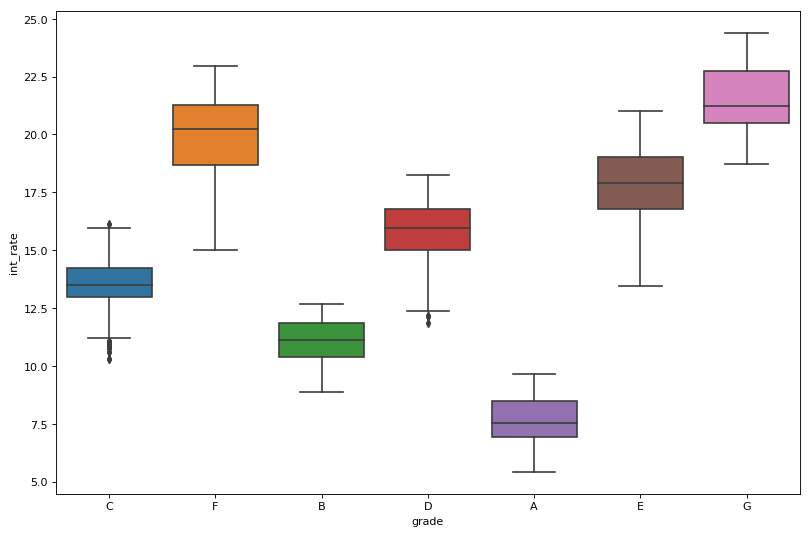

In [21]:
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x='grade', y='int_rate', data=loans_charged_off)
plt.show()

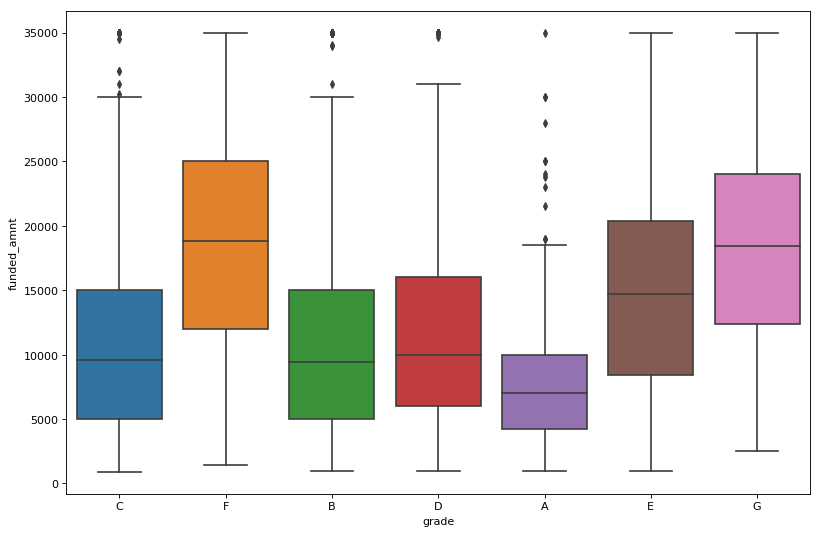

In [22]:
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x='grade', y='funded_amnt', data=loans_charged_off)
plt.show()